# CS6475: Image Frequency Spectra
---
This notebook follows the lectures in Module 4 dealing with frequency domain transforms of images. In many cases (as in the Blending project) there are clear analogues between operations in the frequency and spatial domains, but operating in the frequency domain also affords some unique opportunities. The walkthrough portion illustrates some practical issues that arise out of convention or implementation choices in the Numpy fft module, then proceeds to produce frequency spectra from images. 

You should complete Parts 1-3 by reading through the notebook and executing each code cell (you can use the keyboard shortcut `shift + enter` to execute cells). The last last section of the notebook contains a series of challenge problems that ask you to apply & extend these concepts. There are no required deliverables for this exercise, but you are encouraged to complete & discuss the material & challenge problems on the course forum. This material may appear on the final exam.

## Lesson Summary
---
  - [Part 1 - Fourier Transform Basics](#Part-1:-Fourier-Transform-Basics) -- demonstrate the basics of Fourier transforms
  - [Part 2 - Real Image Spectra](#Part-2:-Real-Image-Spectra) -- visualize images as functions
  - [Part 3 - Challenges](#Part-3:-Challenges) -- apply what you've learned


In [1]:
%matplotlib inline

In [1]:
import cv2

import numpy as np
import numpy.fft as fft
import time
import matplotlib as mpl
from scipy.ndimage import filters
import os

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

mpl.rcParams['image.cmap'] = "gray"  # show images as grayscale by default

In [31]:
def someFunction(energy_matrix):
    cumulativeMatrix = np.zeros((energy_matrix.shape))
    rows, columns = energy_matrix.shape
    print("Cumulative MAtrix Shape: ", cumulativeMatrix.shape)
    for i in range(1, rows):
        for j in range(columns-1):
            cumulativeMatrix[i,j] = energy_matrix[i,j] + min(cumulativeMatrix[i - 1,j - 1], 
                                                             cumulativeMatrix[i - 1, j], 
                                                             cumulativeMatrix[i - 1, j + 1])
    return cumulativeMatrix
    

In [7]:
filename = "couple.png"
path = os.getcwd()
image = cv2.imread("{}\{}".format(path, filename), cv2.IMREAD_COLOR)
img_grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [8]:
chan = []
channels = blue, green, red = cv2.split(image)
for sub_channel in range(len(channels)):
    sobel_x = cv2.Sobel(channels[sub_channel], cv2.CV_64F, 1, 0, ksize=3)
    sobel_x_abs = np.absolute(sobel_x)
    sobel_y = cv2.Sobel(channels[sub_channel], cv2.CV_64F, 0, 1, ksize=3)
    sobel_y_abs = np.absolute(sobel_y)
    sub_channel_energy = np.absolute(np.add(sobel_x, sobel_y))
    chan.append(sub_channel_energy)

energy_map = chan[0]*0.33 + chan[1]*0.33 + chan[2]*0.33
energy_map_image = cv2.merge((chan[0], chan[1], chan[2]))

Cumulative MAtrix Shape:  (500, 333)
No Fails?
(500, 333)


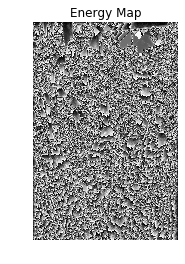

In [38]:
test = someFunction(energy_map)
print("No Fails?")
print(test.shape)
test[0,:] = energy_map[0,:]

new_test = (test * 255.0) / test.max()
cv2.imwrite("WTF.png", new_test)

plt.figure(figsize=(12, 4))
plt.subplot(131); plt.imshow(np.uint8(test)); plt.axis("off"); plt.title("Energy Map");

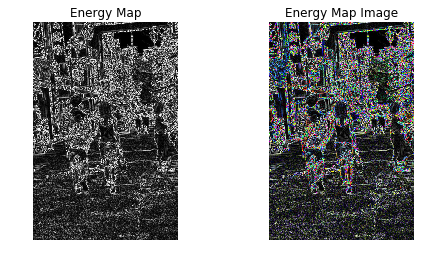

In [12]:

plt.figure(figsize=(12, 4))
plt.subplot(131); plt.imshow(np.uint8(energy_map)); plt.axis("off"); plt.title("Energy Map");
plt.subplot(132); plt.imshow(np.uint8(energy_map_image)); plt.axis("off"); plt.title("Energy Map Image");